In [1]:
import pandas as pd
import string
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\comments_to_post.csv')
df.head()

,comment,likes,my_polarity
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0
3,"Светлана, ты молодец 👍💪💪",1.0,1.0
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0


In [2]:
#del df["my_polarity"]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comment      86 non-null     object 
 1   likes        86 non-null     float64
 2   my_polarity  86 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.1+ KB


In [4]:
#translate comments from Russian into English with TextBlob

In [5]:
from textblob import TextBlob

In [6]:
def translate(x):
    try:
        blob=TextBlob(x)
        return (str(blob.translate(from_lang = 'ru' , to = 'en')))
    except: 
        return None

In [7]:
df['eng_comment'] = df['comment'].apply(lambda x: translate(x)) #Translation happening

In [8]:
df

,comment,likes,my_polarity,eng_comment
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not..."
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a..."
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done"
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...
...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,Thank you for the written! Thank you for readi...
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0,"Yes, I would be a knowledgeable person and und..."
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0,"Well, so read carefully what exactly you wrote..."
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,"I saw their posts, I read what people write ab..."


In [9]:
df.to_csv('C:/Users/dell/Desktop/pliki/translated_comments.csv', encoding = 'utf-8',  index = False)

In [44]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\translated_comments.csv')
df.head()

,comment,likes,my_polarity,eng_comment
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,They did not leave Poland from a good life. I ...
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,"Hello Svetlana! Honestly, we ourselves did not..."
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,"People are different in different countries, a..."
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,"Svetlana, you're well done"
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,Greetings. The author spoke subjectively. For ...


In [45]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\comments_to_post.csv')
df.head()

,comment,likes,my_polarity
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0
3,"Светлана, ты молодец 👍💪💪",1.0,1.0
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0


In [46]:
#del df["my_polarity"]

In [47]:
#my_polarity_plot

In [48]:
#float to int
df['my_polarity'] = df['my_polarity'].astype(int)

In [49]:
df['my_polarity'] = df['my_polarity'].astype(str)

In [50]:
df['my_polarity'] = df['my_polarity'].str.replace('-1', 'neg',regex=True)
df['my_polarity'] = df['my_polarity'].str.replace('1', 'pos',regex=True)
df['my_polarity'] = df['my_polarity'].str.replace('0', 'neu',regex=True)

In [51]:
df

,comment,likes,my_polarity
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,neg
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,pos
2,"люди разные в разных странах, и не зависит от ...",3.0,neg
3,"Светлана, ты молодец 👍💪💪",1.0,pos
4,Приветствую. Автор высказался субъективно. Я м...,8.0,neu
...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,pos
82,да мне бы знающего человека и разбирающегося в...,0.0,pos
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,neu
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,pos


In [52]:
#df['my_polarity'] = df['my_polarity'].apply(lambda x: x.replace("0", "neu"))
#df['my_polarity'] = df['my_polarity'].apply(lambda x: x.replace("1", "pos"))
#df['my_polarity'] = df['my_polarity'].apply(lambda x: x.replace("-1", "neg"))

In [53]:
df

,comment,likes,my_polarity
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,neg
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,pos
2,"люди разные в разных странах, и не зависит от ...",3.0,neg
3,"Светлана, ты молодец 👍💪💪",1.0,pos
4,Приветствую. Автор высказался субъективно. Я м...,8.0,neu
...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,pos
82,да мне бы знающего человека и разбирающегося в...,0.0,pos
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,neu
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,pos


In [54]:
#Preparing the Plot of my_polarity

C:\Users\dell\AppData\Local\Temp/ipykernel_7144/2472466026.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])


Text(0.5, 1.0, "Sentiment of 'comments' by my_polarity")

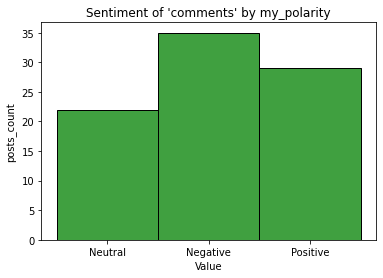

In [57]:
import seaborn as sns
df['my_polarity'].value_counts()

ax = sns.histplot(df['my_polarity'], color = 'green')
#ax.set_style('darkgrid')
ax.set_xlabel("Value")
ax.set_ylabel("posts_count")

ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])
ax.set_title("Sentiment of 'comments' by my_polarity") 